In [2]:
from math import *


In [3]:
class matrix:
    
    # implements basic operations of a matrix class
    
    def __init__(self, value):
        self.value = value
        self.dimx = len(value)
        self.dimy = len(value[0])
        if value == [[]]:
            self.dimx = 0
    
    def zero(self, dimx, dimy):
        # check if valid dimensions
        if dimx < 1 or dimy < 1:
            raise(ValueError, "invalid size of matrix")
        else:
            self.dimx = dimx
            self.dimy = dimy
            self.value = [[0 for row in range(dimy)] for col in range(dimx)]
    
    def identity(self, dim):
        # check if valid dimension
        if dim < 1:
            raise(ValueError, "Invalid size of matrix")
        else:
            self.dimx = dim
            self.dimy = dim
            self.value = [[0 for row in range(dim)] for col in range(dim)]
            for i in range(dim):
                self.value[i][i] = 1
    
    def show(self):
        for i in range(self.dimx):
            print(self.value[i])
        print(' ')
    
    def __add__(self, other):
        # check if correct dimensions
        if self.dimx != other.dimx or self.dimy != other.dimy:
            raise(ValueError, "Matrices must be of equal dimensions to add")
        else:
            # add if correct dimensions
            res = matrix([[]])
            res.zero(self.dimx, self.dimy)
            for i in range(self.dimx):
                for j in range(self.dimy):
                    res.value[i][j] = self.value[i][j] + other.value[i][j]
            return res
    
    def __sub__(self, other):
        # check if correct dimensions
        if self.dimx != other.dimx or self.dimy != other.dimy:
            raise(ValueError, "Matrices must be of equal dimensions to subtract")
        else:
            # subtract if correct dimensions
            res = matrix([[]])
            res.zero(self.dimx, self.dimy)
            for i in range(self.dimx):
                for j in range(self.dimy):
                    res.value[i][j] = self.value[i][j] - other.value[i][j]
            return res
    
    def __mul__(self, other):
        # check if correct dimensions
        if self.dimy != other.dimx:
            raise(ValueError, "Matrices must be m*n and n*p to multiply")
        else:
            # subtract if correct dimensions
            res = matrix([[]])
            res.zero(self.dimx, other.dimy)
            for i in range(self.dimx):
                for j in range(other.dimy):
                    for k in range(self.dimy):
                        res.value[i][j] += self.value[i][k] * other.value[k][j]
            return res
    
    def transpose(self):
        # compute transpose
        res = matrix([[]])
        res.zero(self.dimy, self.dimx)
        for i in range(self.dimx):
            for j in range(self.dimy):
                res.value[j][i] = self.value[i][j]
        return res
    
    # Thanks to Ernesto P. Adorio for use of Cholesky and CholeskyInverse functions
    
    def Cholesky(self, ztol=1.0e-5):
        # Computes the upper triangular Cholesky factorization of
        # a positive definite matrix.
        res = matrix([[]])
        res.zero(self.dimx, self.dimx)
        
        for i in range(self.dimx):
            S = sum([(res.value[k][i])**2 for k in range(i)])
            d = self.value[i][i] - S
            if abs(d) < ztol:
                res.value[i][i] = 0.0
            else:
                if d < 0.0:
                    raise(ValueError, "Matrix not positive-definite")
                res.value[i][i] = sqrt(d)
            for j in range(i+1, self.dimx):
                S = sum([res.value[k][i] * res.value[k][j] for k in range(self.dimx)])
                if abs(S) < ztol:
                    S = 0.0
                try:
                   res.value[i][j] = (self.value[i][j] - S)/res.value[i][i]
                except:
                   raise(ValueError, "Zero diagonal")
        return res
    
    def CholeskyInverse(self):
        # Computes inverse of matrix given its Cholesky upper Triangular
        # decomposition of matrix.
        res = matrix([[]])
        res.zero(self.dimx, self.dimx)
        
        # Backward step for inverse.
        for j in reversed(range(self.dimx)):
            tjj = self.value[j][j]
            S = sum([self.value[j][k]*res.value[j][k] for k in range(j+1, self.dimx)])
            res.value[j][j] = 1.0/tjj**2 - S/tjj
            for i in reversed(range(j)):
                res.value[j][i] = res.value[i][j] = -sum([self.value[i][k]*res.value[k][j] for k in range(i+1, self.dimx)])/self.value[i][i]
        return res
    
    def inverse(self):
        aux = self.Cholesky()
        res = aux.CholeskyInverse()
        return res
    
    def __repr__(self):
        return repr(self.value)

In [4]:
class KalmanFilter():
    def __init__(self):
        x = ""
        P = ""
        F = ""
        H = ""
        R = ""
        I = ""
    
    def MeasurementUpdate(self, measurement):
        Z = matrix([measurement])
        #print("Z")
        #Z.show()
        y = Z.transpose() - (self.H * self.x)
        #print("y")
        #y.show()
        S = self.H * self.P * self.H.transpose() + self.R
        #print("S")
        #S.show()
        K = self.P * self.H.transpose() * S.inverse()
        #print("S_inv")
        #S.inverse().show()
        #print("K")
        #K.show()
        #print("H")
        #self.H.show()
        self.x = self.x + ( K * y )
        self.P = (self.I - (K * self.H)) * self.P
    
    def Prediction(self, externalMotion):
        self.x = (self.F * self.x) + externalMotion

        self.P = self.F * self.P * self.F.transpose()

    def GetState(self):
        return(self.x)
    
    def GetUncertainity(self):
        return(self.P)



## Error Ellipse

In [5]:
import numpy as np

class ErrorEllipse2D:
    def __init__(self, error_mat, kaisq):
        self.error_mat = error_mat
        if error_mat.value[0][0] > error_mat.value[1][1]:
            self.ramda1 = error_mat.value[0][0]
            self.ramda2 = error_mat.value[1][1]
        else:
            self.ramda1 = error_mat.value[1][1]
            self.ramda2 = error_mat.value[0][0]

        self.SetKaiSQParam(kaisq)

        print(self.ramda1,",",self.ramda2,",",self.kaisq)
    
    def SetKaiSQParam(self, kaisq):
        self.kaisq = kaisq

    def GetEllipseParam(self):
        a = sqrt(self.kaisq * self.ramda1)
        b = sqrt(self.kaisq * self.ramda2)
        return(a,b)
    
    def GetEllipsePoints(self):
        a,b = self.GetEllipseParam()

        theta = np.linspace(0, 2*np.pi, 60)

        x = a * np.cos(theta)
        y = b * np.sin(theta)

        return(x,y)


### Ellipse Test

100 , 10 , 9.21


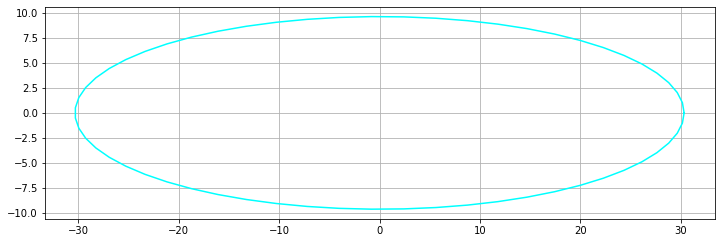

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.grid()
ax.set_aspect('equal')

cov_matrix = matrix([[10,0,0,0],[0,100,0,0]])

error_ec = ErrorEllipse2D(cov_matrix, 9.21)

(x,y) = error_ec.GetEllipsePoints()


ax.plot(x,y,color="cyan")




In [7]:
kf = KalmanFilter()


In [8]:
kf = KalmanFilter()

dt = 0.1
kf.F = matrix([[1,0,dt,0],[0,1,0,dt],[0,0,1,0],[0,0,0,1]])

In [9]:
kf.H = matrix([[1,0,0,0],[0,1,0,0]])
kf.R = matrix([[0.1,0],[0,0.1]])
kf.I = matrix([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])

In [10]:
kf.x = matrix([[4],[12],[0],[0]])
kf.P = matrix([[1,0,0,0],[0,1,0,0],[0,0,10,0],[0,0,0,10]])

In [11]:
kf.x.show()
kf.P.show()
kf.F.show()
kf.H.show()
kf.R.show()
kf.I.show()

[4]
[12]
[0]
[0]
 
[1, 0, 0, 0]
[0, 1, 0, 0]
[0, 0, 10, 0]
[0, 0, 0, 10]
 
[1, 0, 0.1, 0]
[0, 1, 0, 0.1]
[0, 0, 1, 0]
[0, 0, 0, 1]
 
[1, 0, 0, 0]
[0, 1, 0, 0]
 
[0.1, 0]
[0, 0.1]
 
[1, 0, 0, 0]
[0, 1, 0, 0]
[0, 0, 1, 0]
[0, 0, 0, 1]
 


In [12]:


measurements = [[0.2*x * sin(x*pi/720), 0.5*x * cos(x*pi/720)] for x in range(0,100)]
measurements





[[0.0, 0.0],
 [0.0008726618569493143, 0.49999524036036724],
 [0.003490614199349574, 0.9999619230641713],
 [0.007853757342806664, 1.4998714913610105],
 [0.01396192514982681, 1.9996953903127825],
 [0.02181488503456112, 2.4994050676997728],
 [0.031412337969447784, 2.998971974926672],
 [0.04275391849375173, 3.4983675679284953],
 [0.055839194724001555, 3.997563308076383],
 [0.0706676683663235, 4.496530663083253],
 [0.087238774730672, 4.995241107909289],
 [0.10555188274695668, 5.493666125667229],
 [0.1256062949830652, 5.991777208527443],
 [0.14740124766478155, 6.489545858622767],
 [0.17093591069759925, 6.986943588953069],
 [0.19620938769042917, 7.483941924289526],
 [0.22322071598120097, 7.980512402078594],
 [0.2519688666643574, 8.476626573345628],
 [0.2824527446202418, 8.972256003598151],
 [0.3146711885463765, 9.467372273728733],
 [0.34862297099063266, 9.961946980917455],
 [0.38430679838629, 10.45595173953395],
 [0.42172131108898553, 10.949358182038967],
 [0.46086508341555094, 11.44213795988

4.997525977240979 , 4.997525977240979 , 9.21
0 : [0.0, 0.0]  -->  [0.0] [0.0]
4.770866873767029 , 4.770866873767029 , 9.21
1 : [0.0008726618569493143, 0.49999524036036724]  -->  [0.000832670709063903] [0.47708214585529296]
4.10466093608525 , 4.10466093608525 , 9.21
2 : [0.003490614199349574, 0.9999619230641713]  -->  [0.003156538143491289] [0.9876194702129166]
3.477116649620843 , 3.477116649620843 , 9.21
3 : [0.007853757342806664, 1.4998714913610105]  -->  [0.00694141887874546] [1.4923492254626562]
2.9896559148447337 , 2.9896559148447337 , 9.21
4 : [0.01396192514982681, 1.9996953903127825]  -->  [0.012181021158568714] [1.9946861260059559]
2.613684824296121 , 2.613684824296121 , 9.21
5 : [0.02181488503456112, 2.4994050676997728]  -->  [0.018874224935012344] [2.495895804906978]
2.318360869773906 , 2.318360869773906 , 9.21
6 : [0.031412337969447784, 2.998971974926672]  -->  [0.027020749790129504] [2.9964711095440895]
2.0814436406438226 , 2.0814436406438226 , 9.21
7 : [0.04275391849375173,

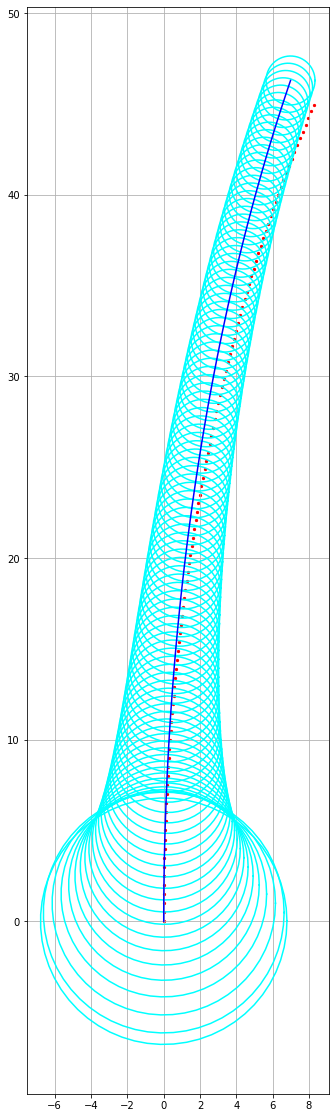

In [13]:

fig,ax = plt.subplots(figsize=[20,20])
ax.grid()
ax.set_aspect('equal')
x = []
y = []
kf = KalmanFilter()
dt = 0.1
kf.F = matrix([[1,0,dt,0],[0,1,0,dt],[0,0,1,0],[0,0,0,1]])
kf.H = matrix([[1,0,0,0],[0,1,0,0]])

measurement_noise = 5.0

kf.R = matrix([[measurement_noise,0],[0,measurement_noise]])
kf.I = matrix([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
kf.x = matrix([[0],[0],[0],[0]])

pos_uncert = 10000
vel_uncert = 10000

kf.P = matrix([[pos_uncert,0,0,0],[0,pos_uncert,0,0],[0,0,vel_uncert,0],[0,0,0,vel_uncert]])
for i in range(len(measurements)):
    kf.Prediction(matrix([[0],[0],[0],[0]]))
    
    print("===Measurement===")
    kf.MeasurementUpdate(measurements[i])

    ec = ErrorEllipse2D(kf.P, 9.21)
    x_p,y_p = ec.GetEllipsePoints()

    x.append(kf.x.value[0])
    y.append(kf.x.value[1])

    x_p += x[-1]
    y_p += y[-1]
    print(i,":", measurements[i], " --> ", x[-1],y[-1])

    ax.plot(x_p,y_p, color="cyan")


ax.plot(x,y,color="blue")
for m in measurements:
    ax.scatter(m[0],m[1],color="red",s=5)

   

0.9980237154150701 , 0.9980237154150701 , 9.21
0 : [0.0, 0.0]  -->  [0.0] [0.0]
0.8564946114577436 , 0.8564946114577436 , 9.21
1 : [0.0008726618569493143, 0.49999524036036724]  -->  [0.0007474301781017959] [0.4282432291231738]
0.7872186349646988 , 0.7872186349646988 , 9.21
2 : [0.003490614199349574, 0.9999619230641713]  -->  [0.0030390973567946964] [0.9540448352884522]
0.6822496212920193 , 0.6822496212920193 , 9.21
3 : [0.007853757342806664, 1.4998714913610105]  -->  [0.0068270648862569835] [1.470626036555781]
0.5918560606060627 , 0.5918560606060627 , 9.21
4 : [0.01396192514982681, 1.9996953903127825]  -->  [0.012076001230053838] [1.979788731215844]
0.5195596264043697 , 0.5195596264043697 , 9.21
5 : [0.02181488503456112, 2.4994050676997728]  -->  [0.018778606155428222] [2.4851031910005883]
0.4618464956566273 , 0.4618464956566273 , 9.21
6 : [0.031412337969447784, 2.998971974926672]  -->  [0.026933381155905396] [2.9883057687168852]
0.41516128001552777 , 0.41516128001552777 , 9.21
7 : [0.

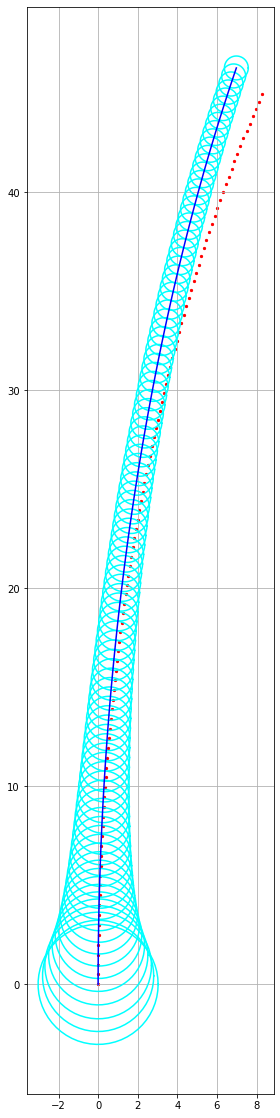

In [14]:

fig2,ax2 = plt.subplots(figsize=[20,20])
#ax2 = fig.add_subplot()
ax2.grid()
ax2.set_aspect('equal')
x = []
y = []
kf = KalmanFilter()
dt = 0.1
kf.F = matrix([[1,0,dt,0],[0,1,0,dt],[0,0,1,0],[0,0,0,1]])
kf.H = matrix([[1,0,0,0],[0,1,0,0]])

measurement_noise = 1.0

kf.R = matrix([[measurement_noise,0],[0,measurement_noise]])
kf.I = matrix([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
kf.x = matrix([[0],[0],[0],[0]])
pos_uncert = 500
vel_uncert = 500

kf.P = matrix([[pos_uncert,0,0,0],[0,pos_uncert,0,0],[0,0,vel_uncert,0],[0,0,0,vel_uncert]])

for i in range(len(measurements)):
    kf.Prediction(matrix([[0],[0],[0],[0]]))
    
    kf.MeasurementUpdate(measurements[i])

    ec = ErrorEllipse2D(kf.P, 9.21)
    x_p,y_p = ec.GetEllipsePoints()

    x.append(kf.x.value[0])
    y.append(kf.x.value[1])

    x_p += x[-1]
    y_p += y[-1]
    print(i,":", measurements[i], " --> ", x[-1],y[-1])

    ax2.plot(x_p,y_p, color="cyan")


ax2.plot(x,y,color="blue")
for m in measurements:
    ax2.scatter(m[0],m[1],color="red",s=5)
plt.show()

   

0.08402662229617304 , 0.08402662229617304 , 9.21
0 : [0.0, 0.0]  -->  [0.0] [0.0]
0.07387975042541123 , 0.07387975042541123 , 9.21
1 : [0.0008726618569493143, 0.49999524036036724]  -->  [0.0001289440803943825] [0.07387904714343486]
0.06746810598626105 , 0.06746810598626105 , 9.21
2 : [0.003490614199349574, 0.9999619230641713]  -->  [0.0005849101858536066] [0.20019051166756857]
0.06359743040685226 , 0.06359743040685226 , 9.21
3 : [0.007853757342806664, 1.4998714913610105]  -->  [0.0015247930306904166] [0.3704281495597877]
0.06150234741784038 , 0.06150234741784038 , 9.21
4 : [0.01396192514982681, 1.9996953903127825]  -->  [0.00310542044199405] [0.5821025187773599]
0.060643564356435635 , 0.060643564356435635 , 9.21
5 : [0.02181488503456112, 2.4994050676997728]  -->  [0.0054970360049686195] [0.8352713148913384]
0.06061484918793502 , 0.06061484918793502 , 9.21
6 : [0.031412337969447784, 2.998971974926672]  -->  [0.008882326633606618] [1.1305603528445136]
0.06109979633401221 , 0.061099796334

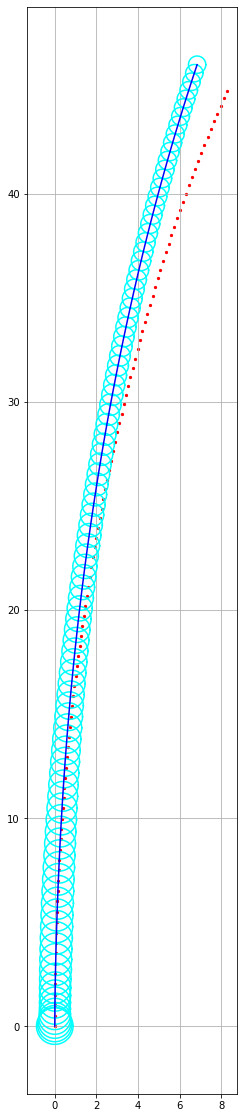

In [29]:

fig2,ax2 = plt.subplots(figsize=[20,20])
#ax2 = fig.add_subplot()
ax2.grid()
ax2.set_aspect('equal')
x = []
y = []
kf = KalmanFilter()
dt = 0.1
kf.F = matrix([[1,0,dt,0],[0,1,0,dt],[0,0,1,0],[0,0,0,1]])
kf.H = matrix([[1,0,0,0],[0,1,0,0]])

measurement_noise = 0.5

kf.R = matrix([[measurement_noise,0],[0,measurement_noise]])
kf.I = matrix([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
kf.x = matrix([[0],[0],[0],[0]])
pos_uncert = 0.1
vel_uncert = 0.1

kf.P = matrix([[pos_uncert,0,0,0],[0,pos_uncert,0,0],[0,0,vel_uncert,0],[0,0,0,vel_uncert]])

for i in range(len(measurements)):
    kf.Prediction(matrix([[0],[0],[0],[0]]))

    if i % 1 ==0:
    #if i % 5 ==0 and i < 50:
        kf.MeasurementUpdate(measurements[i])

    ec = ErrorEllipse2D(kf.P, 9.21)
    x_p,y_p = ec.GetEllipsePoints()

    x.append(kf.x.value[0])
    y.append(kf.x.value[1])

    x_p += x[-1]
    y_p += y[-1]
    print(i,":", measurements[i], " --> ", x[-1],y[-1])

    ax2.plot(x_p,y_p, color="cyan")


ax2.plot(x,y,color="blue")
for m in measurements:
    ax2.scatter(m[0],m[1],color="red",s=5)
plt.show()

   

In [16]:
#kf.Prediction(matrix([[0],[0],[0],[0]]))
#kf.MeasurementUpdate(measurements[0])
#
#for i in range(100):
#    kf.Prediction(matrix([[0],[0],[0],[0]]))
#    print("X")
#    kf.x.show()
#    print("P")
#    kf.P.show()
#    kf.P.inverse().show()

X
[5.734605799392972]
[38.91333923608287]
[0.6303064005071319]
[3.3935767540173307]
 
P
[0.182719221281367, 0.0, 0.026488596806502545, 0.0]
[0.0, 0.182719221281367, 0.0, 0.026488596806502545]
[0.02648859680650253, 0.0, 0.005193347953612639, 0.0]
[0.0, 0.02648859680650253, 0.0, 0.005193347953612639]
 
[21.00200000000003, -0.0, -107.12039999999999, -0.0]
[-0.0, 21.00200000000003, -0.0, -107.12039999999999]
[-107.12039999999999, -0.0, 738.9200799999976, -0.0]
[-0.0, -107.12039999999999, -0.0, 738.9200799999976]
 
X
[5.797636439443686]
[39.252696911484605]
[0.6303064005071319]
[3.3935767540173307]
 
P
[0.18806887412220363, 0.0, 0.027007931601863808, 0.0]
[0.0, 0.18806887412220363, 0.0, 0.027007931601863808]
[0.027007931601863794, 0.0, 0.005193347953612639, 0.0]
[0.0, 0.027007931601863794, 0.0, 0.005193347953612639]
 
[21.002000000000013, -0.0, -109.2205999999999, -0.0]
[-0.0, 21.002000000000013, -0.0, -109.2205999999999]
[-109.2205999999999, -0.0, 760.5541799999971, -0.0]
[-0.0, -109.22059